In [1]:
import pandas as pd

df = pd.read_csv("/content/listings_sample.csv")   # example name — replace with actual file
df.head()


,id,address,city,state,price,beds,baths,sqft,remarks,agent_id,list_date,media_urls
0,MLS-TX-1000,"960 Cedar Ct, Frisco, TX",Frisco,TX,803788,3,3,3892,"quiet cul-de-sac, two-car garage, near good sc...",AG7396,2025-07-14,"[""https://picsum.photos/seed/0/1200/800""]"
1,MLS-CA-1001,"2658 Elm Dr, Santa Clara, CA",Santa Clara,CA,1908765,3,2,3547,"fresh paint, new roof 2022, large backyard, HO...",AG3612,2024-12-05,"[""https://picsum.photos/seed/1/1200/800""]"
2,MLS-CA-1002,"7199 Birch Way, Mountain View, CA",Mountain View,CA,507705,4,3,1575,"updated kitchen, stainless appliances, fresh p...",AG1995,2024-09-26,"[""https://picsum.photos/seed/2/1200/800""]"
3,MLS-TX-1003,"7729 Walnut Blvd, Frisco, TX",Frisco,TX,1016982,4,1,3143,"granite counters, new roof 2022, tile flooring...",AG6892,2025-05-04,"[""https://picsum.photos/seed/3/1200/800""]"
4,MLS-TX-1004,"6284 Oak Ave, Frisco, TX",Frisco,TX,682810,4,1,2663,"two-car garage, hardwood floors, vaulted ceili...",AG6977,2025-07-07,"[""https://picsum.photos/seed/4/1200/800""]"


In [2]:
df.info()
df.describe()
df.isnull().sum()

df = df.drop_duplicates()
df = df.dropna(subset=['price', 'sqft'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          160 non-null    object
 1   address     160 non-null    object
 2   city        160 non-null    object
 3   state       160 non-null    object
 4   price       160 non-null    int64 
 5   beds        160 non-null    int64 
 6   baths       160 non-null    int64 
 7   sqft        160 non-null    int64 
 8   remarks     160 non-null    object
 9   agent_id    160 non-null    object
 10  list_date   160 non-null    object
 11  media_urls  160 non-null    object
dtypes: int64(4), object(8)
memory usage: 15.1+ KB


In [3]:
df['beds'] = df['beds'].fillna(df['beds'].median())
df['baths'] = df['baths'].fillna(df['baths'].median())

df['remarks'] = df['remarks'].fillna("")

df['price'] = df['price'].astype(float)
df['sqft'] = df['sqft'].astype(float)
df['beds'] = df['beds'].astype(int)
df['baths'] = df['baths'].astype(float)

df = df[df['price'] < df['price'].quantile(0.99)]
df = df[df['sqft'] > 200]


**Computing Price per SQFT**

In [4]:
df['price_per_sqft'] = df['price'] / df['sqft']

In [5]:
df['remarks'] = df['remarks'].str.lower()
df['remarks'] = df['remarks'].str.replace('\n', ' ', regex=False)
df['remarks'] = df['remarks'].str.strip()

df_clean=df

df_clean.to_csv("normalized_dataset.csv", index=False)

In [6]:
df_clean.describe()
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 159
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    object 
 1   address         158 non-null    object 
 2   city            158 non-null    object 
 3   state           158 non-null    object 
 4   price           158 non-null    float64
 5   beds            158 non-null    int64  
 6   baths           158 non-null    float64
 7   sqft            158 non-null    float64
 8   remarks         158 non-null    object 
 9   agent_id        158 non-null    object 
 10  list_date       158 non-null    object 
 11  media_urls      158 non-null    object 
 12  price_per_sqft  158 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 17.3+ KB


,0
id,0
address,0
city,0
state,0
price,0
beds,0
baths,0
sqft,0
remarks,0
agent_id,0


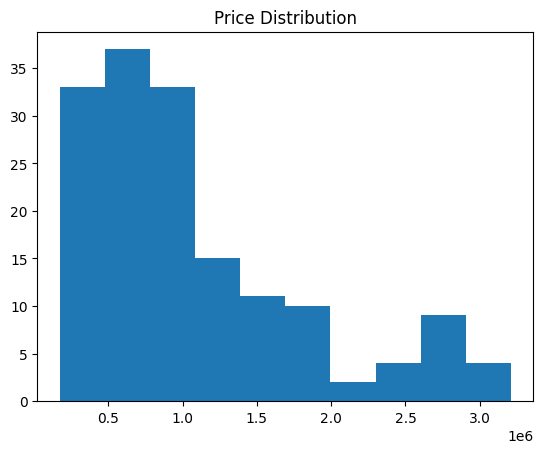

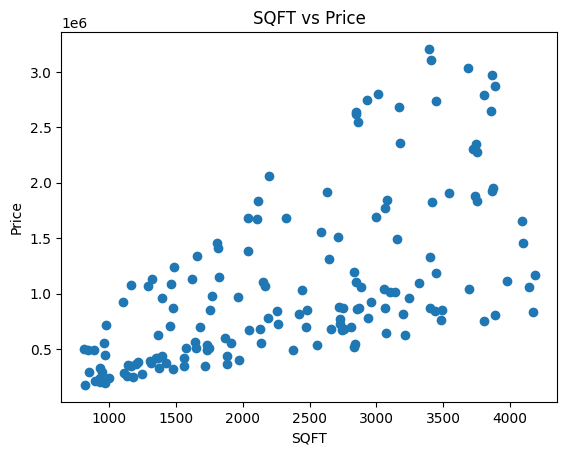

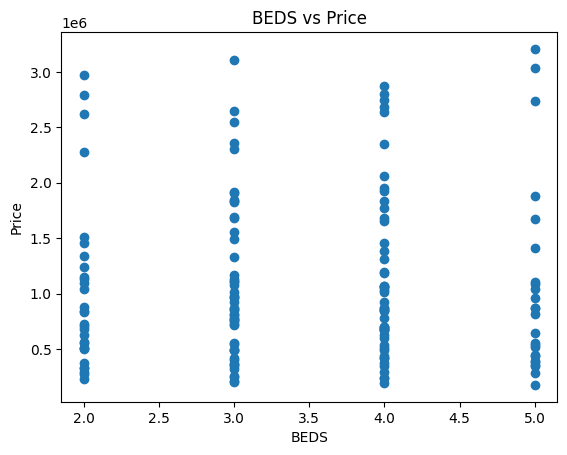

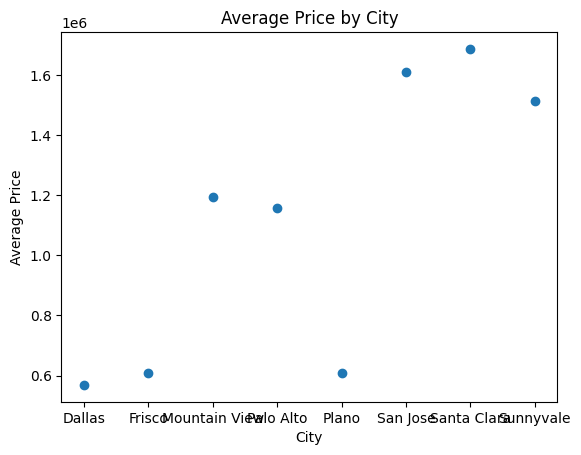

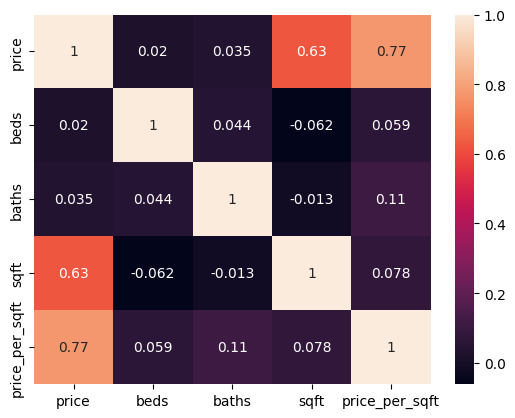

In [7]:
import matplotlib.pyplot as plt

plt.hist(df_clean['price'])
plt.title("Price Distribution")
plt.show()

plt.scatter(df_clean['sqft'], df_clean['price'])
plt.xlabel("SQFT")
plt.ylabel("Price")
plt.title("SQFT vs Price")
plt.show()

plt.scatter(df_clean['beds'], df_clean['price'])
plt.xlabel("BEDS")
plt.ylabel("Price")
plt.title("BEDS vs Price")
plt.show()

avg_price_by_city = df_clean.groupby('city')['price'].mean().reset_index()

plt.scatter(avg_price_by_city['city'], avg_price_by_city['price'])
plt.xlabel("City")
plt.ylabel("Average Price")
plt.title("Average Price by City")
plt.show()

import seaborn as sns

sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.show()

In [8]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/normalized_dataset.csv")
df_clean = df.copy()

# 1. PRICE BAND (Low / Medium / High)
df_clean['price_band'] = pd.qcut(df_clean['price'], q=3, labels=['Low', 'Medium', 'High'])

# 2. CITY MEDIAN PRICE
city_median = df_clean.groupby('city')['price'].median().to_dict()

# 3. EXPENSIVE (1) / AFFORDABLE (0)
df_clean['expensive'] = df_clean.apply(
    lambda row: 1 if row['price'] > city_median[row['city']] else 0,
    axis=1
)

df_clean.head()

,id,address,city,state,price,beds,baths,sqft,remarks,agent_id,list_date,media_urls,price_per_sqft,price_band,expensive
0,MLS-TX-1000,"960 Cedar Ct, Frisco, TX",Frisco,TX,803788.0,3,3.0,3892.0,"quiet cul-de-sac, two-car garage, near good sc...",AG7396,2025-07-14,"[""https://picsum.photos/seed/0/1200/800""]",206.523124,Medium,1
1,MLS-CA-1001,"2658 Elm Dr, Santa Clara, CA",Santa Clara,CA,1908765.0,3,2.0,3547.0,"fresh paint, new roof 2022, large backyard, ho...",AG3612,2024-12-05,"[""https://picsum.photos/seed/1/1200/800""]",538.135044,High,1
2,MLS-CA-1002,"7199 Birch Way, Mountain View, CA",Mountain View,CA,507705.0,4,3.0,1575.0,"updated kitchen, stainless appliances, fresh p...",AG1995,2024-09-26,"[""https://picsum.photos/seed/2/1200/800""]",322.352381,Low,0
3,MLS-TX-1003,"7729 Walnut Blvd, Frisco, TX",Frisco,TX,1016982.0,4,1.0,3143.0,"granite counters, new roof 2022, tile flooring...",AG6892,2025-05-04,"[""https://picsum.photos/seed/3/1200/800""]",323.570474,Medium,1
4,MLS-TX-1004,"6284 Oak Ave, Frisco, TX",Frisco,TX,682810.0,4,1.0,2663.0,"two-car garage, hardwood floors, vaulted ceili...",AG6977,2025-07-07,"[""https://picsum.photos/seed/4/1200/800""]",256.406309,Medium,1


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/content/normalized_dataset.csv')

# Quick cleaning: drop rows with missing critical numeric values
df = df.dropna(subset=['price', 'sqft'])

# Create price_band (terciles)
df['price_band'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Create expensive (1) vs affordable (0) based on city median
city_median = df.groupby('city')['price'].median().to_dict()
df['expensive'] = df.apply(
    lambda row: 1 if row['price'] > city_median[row['city']] else 0,
    axis=1
)

# Feature sets
numeric_features = ['beds', 'baths', 'sqft', 'price_per_sqft']
categorical_features = ['city']

# Fill numeric NaNs with median
for c in numeric_features:
    df[c] = df[c].fillna(df[c].median())

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Helper functions
def eval_regression_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('pre', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    return {'r2': r2_score(y_test, preds),
            'mae': mean_absolute_error(y_test, preds)}

def eval_classification_model(model, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('pre', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds, average='macro', zero_division=0),
        'recall': recall_score(y_test, preds, average='macro', zero_division=0),
        'f1': f1_score(y_test, preds, average='macro', zero_division=0)
    }

results = []

# ---------- 1) PRICE REGRESSION ----------
X = df[numeric_features + categorical_features]
y_price = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
lr_res = eval_regression_model(LinearRegression(), X_train, X_test, y_train, y_test)
rf_res = eval_regression_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

results.append({'task':'price_regression', 'model':'LinearRegression', **lr_res})
results.append({'task':'price_regression', 'model':'RandomForestRegressor', **rf_res})

# ---------- 2) PRICE PER SQFT REGRESSION ----------
y_pps = df['price_per_sqft']
X_train, X_test, y_train, y_test = train_test_split(X, y_pps, test_size=0.2, random_state=42)

lr_res = eval_regression_model(LinearRegression(), X_train, X_test, y_train, y_test)
rf_res = eval_regression_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

results.append({'task':'price_per_sqft_regression', 'model':'LinearRegression', **lr_res})
results.append({'task':'price_per_sqft_regression', 'model':'RandomForestRegressor', **rf_res})

# ---------- 3) SQFT REGRESSION ----------
X_sqft = df[['beds','baths','price'] + categorical_features]
y_sqft = df['sqft']

preprocessor_sqft = ColumnTransformer([
    ('num', numeric_transformer, ['beds','baths','price']),
    ('cat', categorical_transformer, categorical_features)
])

def eval_reg_custom(model, preproc, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('pre', preproc), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    return {'r2': r2_score(y_test, preds),
            'mae': mean_absolute_error(y_test, preds)}

X_train, X_test, y_train, y_test = train_test_split(X_sqft, y_sqft, test_size=0.2, random_state=42)
lr_res = eval_reg_custom(LinearRegression(), preprocessor_sqft, X_train, X_test, y_train, y_test)
rf_res = eval_reg_custom(RandomForestRegressor(n_estimators=100, random_state=42), preprocessor_sqft, X_train, X_test, y_train, y_test)

results.append({'task':'sqft_regression', 'model':'LinearRegression', **lr_res})
results.append({'task':'sqft_regression', 'model':'RandomForestRegressor', **rf_res})

# ---------- 4) PRICE BAND CLASSIFICATION ----------
y_band = df['price_band']
X_train, X_test, y_train, y_test = train_test_split(X, y_band, test_size=0.2, random_state=42)

rf_clf_res = eval_classification_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)
results.append({'task':'price_band_classification', 'model':'RandomForestClassifier', **rf_clf_res})

# ---------- 5) EXPENSIVE BINARY CLASSIFICATION ----------
y_exp = df['expensive']
X_train, X_test, y_train, y_test = train_test_split(X, y_exp, test_size=0.2, random_state=42)

rf_clf_res = eval_classification_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)
results.append({'task':'expensive_binary', 'model':'RandomForestClassifier', **rf_clf_res})

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,task,model,r2,mae,accuracy,precision,recall,f1
0,price_regression,LinearRegression,0.910568,2.232812e+05,NaN,NaN,NaN,NaN
1,price_regression,RandomForestRegressor,0.971454,9.244425e+04,NaN,NaN,NaN,NaN
2,price_per_sqft_regression,LinearRegression,1.000000,3.090861e-13,NaN,NaN,NaN,NaN
3,price_per_sqft_regression,RandomForestRegressor,0.999658,3.001734e+00,NaN,NaN,NaN,NaN
4,sqft_regression,LinearRegression,0.431840,6.400038e+02,NaN,NaN,NaN,NaN
5,sqft_regression,RandomForestRegressor,0.708249,4.290588e+02,NaN,NaN,NaN,NaN
6,price_band_classification,RandomForestClassifier,NaN,NaN,0.90625,0.902389,0.900285,0.899662
7,expensive_binary,RandomForestClassifier,NaN,NaN,0.90625,0.900000,0.925000,0.903904


In [10]:
import pandas as pd
import re

# Load your normalized dataset
df = pd.read_csv("normalized_dataset.csv")

# Check the column
df['remarks'].head()

,remarks
0,"quiet cul-de-sac, two-car garage, near good sc..."
1,"fresh paint, new roof 2022, large backyard, ho..."
2,"updated kitchen, stainless appliances, fresh p..."
3,"granite counters, new roof 2022, tile flooring..."
4,"two-car garage, hardwood floors, vaulted ceili..."


In [11]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()                                 # lowercase
    text = re.sub(r'\s+', ' ', text)                    # remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)                 # remove special chars
    text = text.strip()
    return text

df['clean_remarks'] = df['remarks'].apply(clean_text)

df[['remarks', 'clean_remarks']].head()

,remarks,clean_remarks
0,"quiet cul-de-sac, two-car garage, near good sc...",quiet culdesac twocar garage near good schools...
1,"fresh paint, new roof 2022, large backyard, ho...",fresh paint new roof 2022 large backyard hoa i...
2,"updated kitchen, stainless appliances, fresh p...",updated kitchen stainless appliances fresh pai...
3,"granite counters, new roof 2022, tile flooring...",granite counters new roof 2022 tile flooring q...
4,"two-car garage, hardwood floors, vaulted ceili...",twocar garage hardwood floors vaulted ceilings...


In [12]:
!pip install faiss-cpu sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 65.5 MB/s eta 0:00:00


In [13]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

In [14]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
df['embedding_text'] = (
    df['clean_remarks'].astype(str) + " | " +
    df['city'].astype(str) + " | " +

    df['price_per_sqft'].astype(str) + " price per sqft |"

)

texts = df['embedding_text'].tolist()
embeddings = model.encode(texts, show_progress_bar=True, convert_to_numpy=True)


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [18]:
dimension = embeddings.shape[1]  # should be 384
index = faiss.IndexFlatL2(dimension)  # L2 distance index

# Add embeddings to the index
index.add(embeddings)

print("Number of vectors in the index:", index.ntotal)
embeddings = model.encode(texts)
embeddings.shape

Number of vectors in the index: 158


(158, 384)

In [19]:
import faiss
embedding_dim = embeddings.shape[1]  # 384
index = faiss.IndexFlatL2(embedding_dim)  # L2 distance
index.add(embeddings)
print("Total embeddings in index:", index.ntotal)
faiss.write_index(index, "remarks_faiss_index.index")

Total embeddings in index: 158


In [36]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline

# Load the embedding model (same one you used before)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load your saved FAISS index
index = faiss.read_index("/content/remarks_faiss_index.index")

# Load your dataset again (so we can map back to remarks)
import pandas as pd
df = pd.read_csv("normalized_dataset.csv")

remarks_list = df["remarks"].astype(str).tolist()
all_rows = df.to_dict("records")

# Load local open-source LLM (small + works on Colab)
llm = pipeline("text2text-generation", model="google/flan-t5-small")


def ask_question(query, top_k=5):
    # Convert query to embedding
    query_vec = embedding_model.encode([query])

    # Search FAISS
    distances, indices = index.search(query_vec, top_k)

    # Retrieve matched remarks
    retrieved_rows = [all_rows[i] for i in indices[0]]
    retrieved_texts = [row["remarks"] for row in retrieved_rows]


    # Build LLM prompt
    context = "\n".join(retrieved_texts)
    prompt = f"""Use the context to answer correctly.

Context:
{context}

Question: {query}
Answer:"""

    # Generate answer
    response = llm(prompt, max_length=200)

    return response[0]["generated_text"]

# Test the system
question = "Which listings have garden?"
print(ask_question(question))


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


home office, updated kitchen, corner lot, fresh paint large backyard, open concept, corner lot, hoa includes pool, walk to park, primary suite, updated kitchen, large backyard, fresh paint, new roof 2022


In [42]:
%%writefile app.py
import streamlit as st
import faiss
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline

# Page title
st.title("📘 RAG Mini Edition — Snaphomz")
st.subheader("Ask anything from your dataset!")

# Input box
query = st.text_input("Ask a question:")

# Load models
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
llm = pipeline("text2text-generation", model="google/flan-t5-small")

# Load FAISS index and data
index = faiss.read_index("remarks_faiss_index.index")
df = pd.read_csv("normalized_dataset.csv")

# Store remarks + full rows
remarks_list = df["remarks"].astype(str).tolist()
all_rows = df.to_dict("records")

if st.button("Search") and query:
    with st.spinner("Searching… 🔍"):

        # Convert query to embedding
        q_emb = embedding_model.encode([query]).astype("float32")

        # Search FAISS
        D, I = index.search(q_emb, 3)

        # Show matched row numbers
        st.subheader("📌 Matched Row Indexes")
        st.write(I[0])

        # Show top remark matches
        st.subheader("🔎 Top Matches (Remarks)")
        for i in I[0]:
            st.write("•", remarks_list[i])

        # Show full row data
        st.subheader("📋 Full Row Data")
        for i in I[0]:
            st.json(all_rows[i])

        # Build context for LLM
        context = "\n".join([remarks_list[i] for i in I[0]])

        # LLM Prompt
        prompt = f"""Use the context to answer correctly.

Context:
{context}

Question: {query}
Answer:"""

        # Generate answer
        result = llm(prompt, max_length=250)

        # Show Answer
        st.subheader("✅ Answer")
        st.write(result[0]["generated_text"])



Overwriting app.py


In [43]:
!pip install pyngrok

In [44]:
#!pip install streamlit pyngrok
import subprocess

# Kill old tunnels
ngrok.kill()

# Set your valid ngrok authtoken here. Replace "YOUR_NGROK_AUTH_TOKEN" with your actual token.
ngrok.set_auth_token("363l5bs4vLk1LSvvj5YZmGzOg6A_2WmvbtckRer712r4Cv9sf") # <-- REPLACE THIS WITH YOUR REAL NGROK AUTH TOKEN

# Connect to 8501
public_url = ngrok.connect(8501).public_url
print("Your public Streamlit URL:", public_url)


# Run streamlit (this runs your app.py file)
process = subprocess.Popen(["streamlit", "run", "/content/app.py", "--server.port=8501"])

Your public Streamlit URL: https://hispid-arciform-esteban.ngrok-free.dev
